In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords

import spacy

import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from collections import defaultdict
from collections import  Counter


plt.rcParams['figure.dpi'] = 300


In [7]:
data= pd.read_csv('result.csv')
data.head()

,timestamp,tweet_text
0,2021-12-09 17:00:12+00:00,Today we shared details about how @CVSHealth i...
1,2021-12-02 16:38:09+00:00,It was a pleasure to join @Microsoft CEO @Saty...
2,2021-12-01 14:29:59+00:00,Congratulations to this year’s #Bloomberg50. I...
3,2021-11-11 14:00:19+00:00,"On #VeteransDay, I want to recognize and thank..."
4,2021-11-03 13:15:11+00:00,Earlier today @CVSHealth posted third quarter ...


In [147]:
df = data.copy()

In [153]:
def remove_whites(text):
    
    new_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    
    return new_text

In [154]:
df['tweet_text']=df['tweet_text'].apply(lambda x: remove_whites(x))
df

,timestamp,tweet_text
0,2021-12-09 17:00:12+00:00,Today we shared details about how @CVSHealth i...
1,2021-12-02 16:38:09+00:00,It was a pleasure to join @Microsoft CEO @Saty...
2,2021-12-01 14:29:59+00:00,Congratulations to this year’s #Bloomberg50. I...
3,2021-11-11 14:00:19+00:00,"On #VeteransDay, I want to recognize and thank..."
4,2021-11-03 13:15:11+00:00,Earlier today @CVSHealth posted third quarter ...
...,...,...
829,2017-08-24 15:05:29+00:00,Thank you @GovMattBevin for being an ally in t...
830,2017-08-23 22:00:17+00:00,"With @AbleTo_Health, we provide consumers with..."
831,2017-08-23 20:57:36+00:00,RT @GovMattBevin: We don't have the luxury of ...
832,2017-08-23 20:16:12+00:00,Proud of our efforts to combat the opioid epid...


In [157]:
def remove_URL(text):
    
    new_text = re.sub(r'https?://\S+|www\.\S+', r'',text) # http, https, www.
    return re.sub(r'\[A-Za-z]*\.com', r'', new_text) # all .com occurences
    

In [158]:
df['tweet_text']=df['tweet_text'].apply(lambda x : remove_URL(x))
df

,timestamp,tweet_text
0,2021-12-09 17:00:12+00:00,Today we shared details about how @CVSHealth i...
1,2021-12-02 16:38:09+00:00,It was a pleasure to join @Microsoft CEO @Saty...
2,2021-12-01 14:29:59+00:00,Congratulations to this year’s #Bloomberg50. I...
3,2021-11-11 14:00:19+00:00,"On #VeteransDay, I want to recognize and thank..."
4,2021-11-03 13:15:11+00:00,Earlier today @CVSHealth posted third quarter ...
...,...,...
829,2017-08-24 15:05:29+00:00,Thank you @GovMattBevin for being an ally in t...
830,2017-08-23 22:00:17+00:00,"With @AbleTo_Health, we provide consumers with..."
831,2017-08-23 20:57:36+00:00,RT @GovMattBevin: We don't have the luxury of ...
832,2017-08-23 20:16:12+00:00,Proud of our efforts to combat the opioid epid...


In [159]:
## removing words start with @
def remove_at(text):
    at_pattern = re.compile("(\s)@\w+|@\w+")
    return at_pattern.sub(r'',text)

In [160]:
df['tweet_text']=df['tweet_text'].apply(lambda x: remove_at(x))
df

,timestamp,tweet_text
0,2021-12-09 17:00:12+00:00,Today we shared details about how is revolutio...
1,2021-12-02 16:38:09+00:00,It was a pleasure to join CEO during the Healt...
2,2021-12-01 14:29:59+00:00,Congratulations to this year’s #Bloomberg50. I...
3,2021-11-11 14:00:19+00:00,"On #VeteransDay, I want to recognize and thank..."
4,2021-11-03 13:15:11+00:00,Earlier today posted third quarter 2021 earnin...
...,...,...
829,2017-08-24 15:05:29+00:00,Thank you for being an ally in the fight again...
830,2017-08-23 22:00:17+00:00,"With, we provide consumers with access to pers..."
831,2017-08-23 20:57:36+00:00,RT: We don't have the luxury of pretending the...
832,2017-08-23 20:16:12+00:00,Proud of our efforts to combat the opioid epid...


In [149]:
sw = stopwords.words('english')

In [116]:
for i in ["i'm",'i’m', "i'd", "i'll", "there's", "there're", "he's", "he'd", "he'll", "she's", "she'd", "she'll", 
          "they're", "they'd", "they'll", "they've", "we're", "we've", "we'll", "it'll", "it'd", 'us', 'via', 'ive', 'weve', 'theyve', "you'll", 'youll']:
    sw.append(i)

In [117]:
def remove_stop(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [118]:
df['tweet_text'] = df['tweet_text'].apply(remove_stop)
df

,timestamp,tweet_text
0,2021-12-09 17:00:12+00:00,today shared details revolutionizing consumer ...
1,2021-12-02 16:38:09+00:00,pleasure join ceo healthcare summit discussion...
2,2021-12-01 14:29:59+00:00,congratulations years bloomberg50 honored reco...
3,2021-11-11 14:00:19+00:00,veteransday want recognize thank colleagues ve...
4,2021-11-03 13:15:11+00:00,earlier today posted third quarter 2021 earnin...
...,...,...
829,2017-08-24 15:05:29+00:00,thank ally fight opioids dontletthemdie
830,2017-08-23 22:00:17+00:00,provide consumers access personalized behavior...
831,2017-08-23 20:57:36+00:00,luxury pretending problem helping address issu...
832,2017-08-23 20:16:12+00:00,proud efforts combat opioid epidemic providing...


In [119]:
punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~´’<>°≤‘±–“”'

In [120]:
def remove_punctuation(text):
    
    translator = str.maketrans('', '', punc)
    return text.translate(translator)

In [121]:
df['tweet_text'] = df['tweet_text'].apply(remove_punctuation)
df

,timestamp,tweet_text
0,2021-12-09 17:00:12+00:00,today shared details revolutionizing consumer ...
1,2021-12-02 16:38:09+00:00,pleasure join ceo healthcare summit discussion...
2,2021-12-01 14:29:59+00:00,congratulations years bloomberg50 honored reco...
3,2021-11-11 14:00:19+00:00,veteransday want recognize thank colleagues ve...
4,2021-11-03 13:15:11+00:00,earlier today posted third quarter 2021 earnin...
...,...,...
829,2017-08-24 15:05:29+00:00,thank ally fight opioids dontletthemdie
830,2017-08-23 22:00:17+00:00,provide consumers access personalized behavior...
831,2017-08-23 20:57:36+00:00,luxury pretending problem helping address issu...
832,2017-08-23 20:16:12+00:00,proud efforts combat opioid epidemic providing...


In [122]:
## removing specific unusefull words...
def remove_words(text):
    word_pattern = re.compile('pm\s|pm$|am\s|am$|tbt\s|tbt$|rt\s|rt$|rts\s|rts$|gmt\s|gmt$|pt\s|pt$|')
    return word_pattern.sub(r'',text)

In [123]:
df['tweet_text']=df['tweet_text'].apply(lambda x: remove_words(x))
df

,timestamp,tweet_text
0,2021-12-09 17:00:12+00:00,today shared details revolutionizing consumer ...
1,2021-12-02 16:38:09+00:00,pleasure join ceo healthcare summit discussion...
2,2021-12-01 14:29:59+00:00,congratulations years bloomberg50 honored reco...
3,2021-11-11 14:00:19+00:00,veteransday want recognize thank colleagues ve...
4,2021-11-03 13:15:11+00:00,earlier today posted third quarter 2021 earnin...
...,...,...
829,2017-08-24 15:05:29+00:00,thank ally fight opioids dontletthemdie
830,2017-08-23 22:00:17+00:00,provide consumers access personalized behavior...
831,2017-08-23 20:57:36+00:00,luxury pretending problem helping address issu...
832,2017-08-23 20:16:12+00:00,proud effocombat opioid epidemic providing nar...


In [124]:
df_nlp = df.copy()

In [125]:
nlp = spacy.load('en')
doc = df_nlp['tweet_text'].apply(nlp)

In [126]:
##lemmatization

for i, sent in enumerate(doc):
    df_nlp.loc[i, 'lemma']=' '.join([token.lemma_ for token in sent])

In [127]:
df_nlp

,timestamp,tweet_text,lemma
0,2021-12-09 17:00:12+00:00,today shared details revolutionizing consumer ...,today share detail revolutionize consumer heal...
1,2021-12-02 16:38:09+00:00,pleasure join ceo healthcare summit discussion...,pleasure join ceo healthcare summit discussion...
2,2021-12-01 14:29:59+00:00,congratulations years bloomberg50 honored reco...,congratulation year bloomberg50 honor recogniz...
3,2021-11-11 14:00:19+00:00,veteransday want recognize thank colleagues ve...,veteransday want recognize thank colleague vet...
4,2021-11-03 13:15:11+00:00,earlier today posted third quarter 2021 earnin...,early today post third quarter 2021 earning re...
...,...,...,...
829,2017-08-24 15:05:29+00:00,thank ally fight opioids dontletthemdie,thank ally fight opioids dontletthemdie
830,2017-08-23 22:00:17+00:00,provide consumers access personalized behavior...,provide consumer access personalize behavioral...
831,2017-08-23 20:57:36+00:00,luxury pretending problem helping address issu...,luxury pretend problem help address issue head...
832,2017-08-23 20:16:12+00:00,proud effocombat opioid epidemic providing nar...,proud effocombat opioid epidemic provide narca...


In [128]:
corpus_lemma=[]
for sent in df_nlp['lemma']:
    for word in sent.split():
        corpus_lemma.append(word)

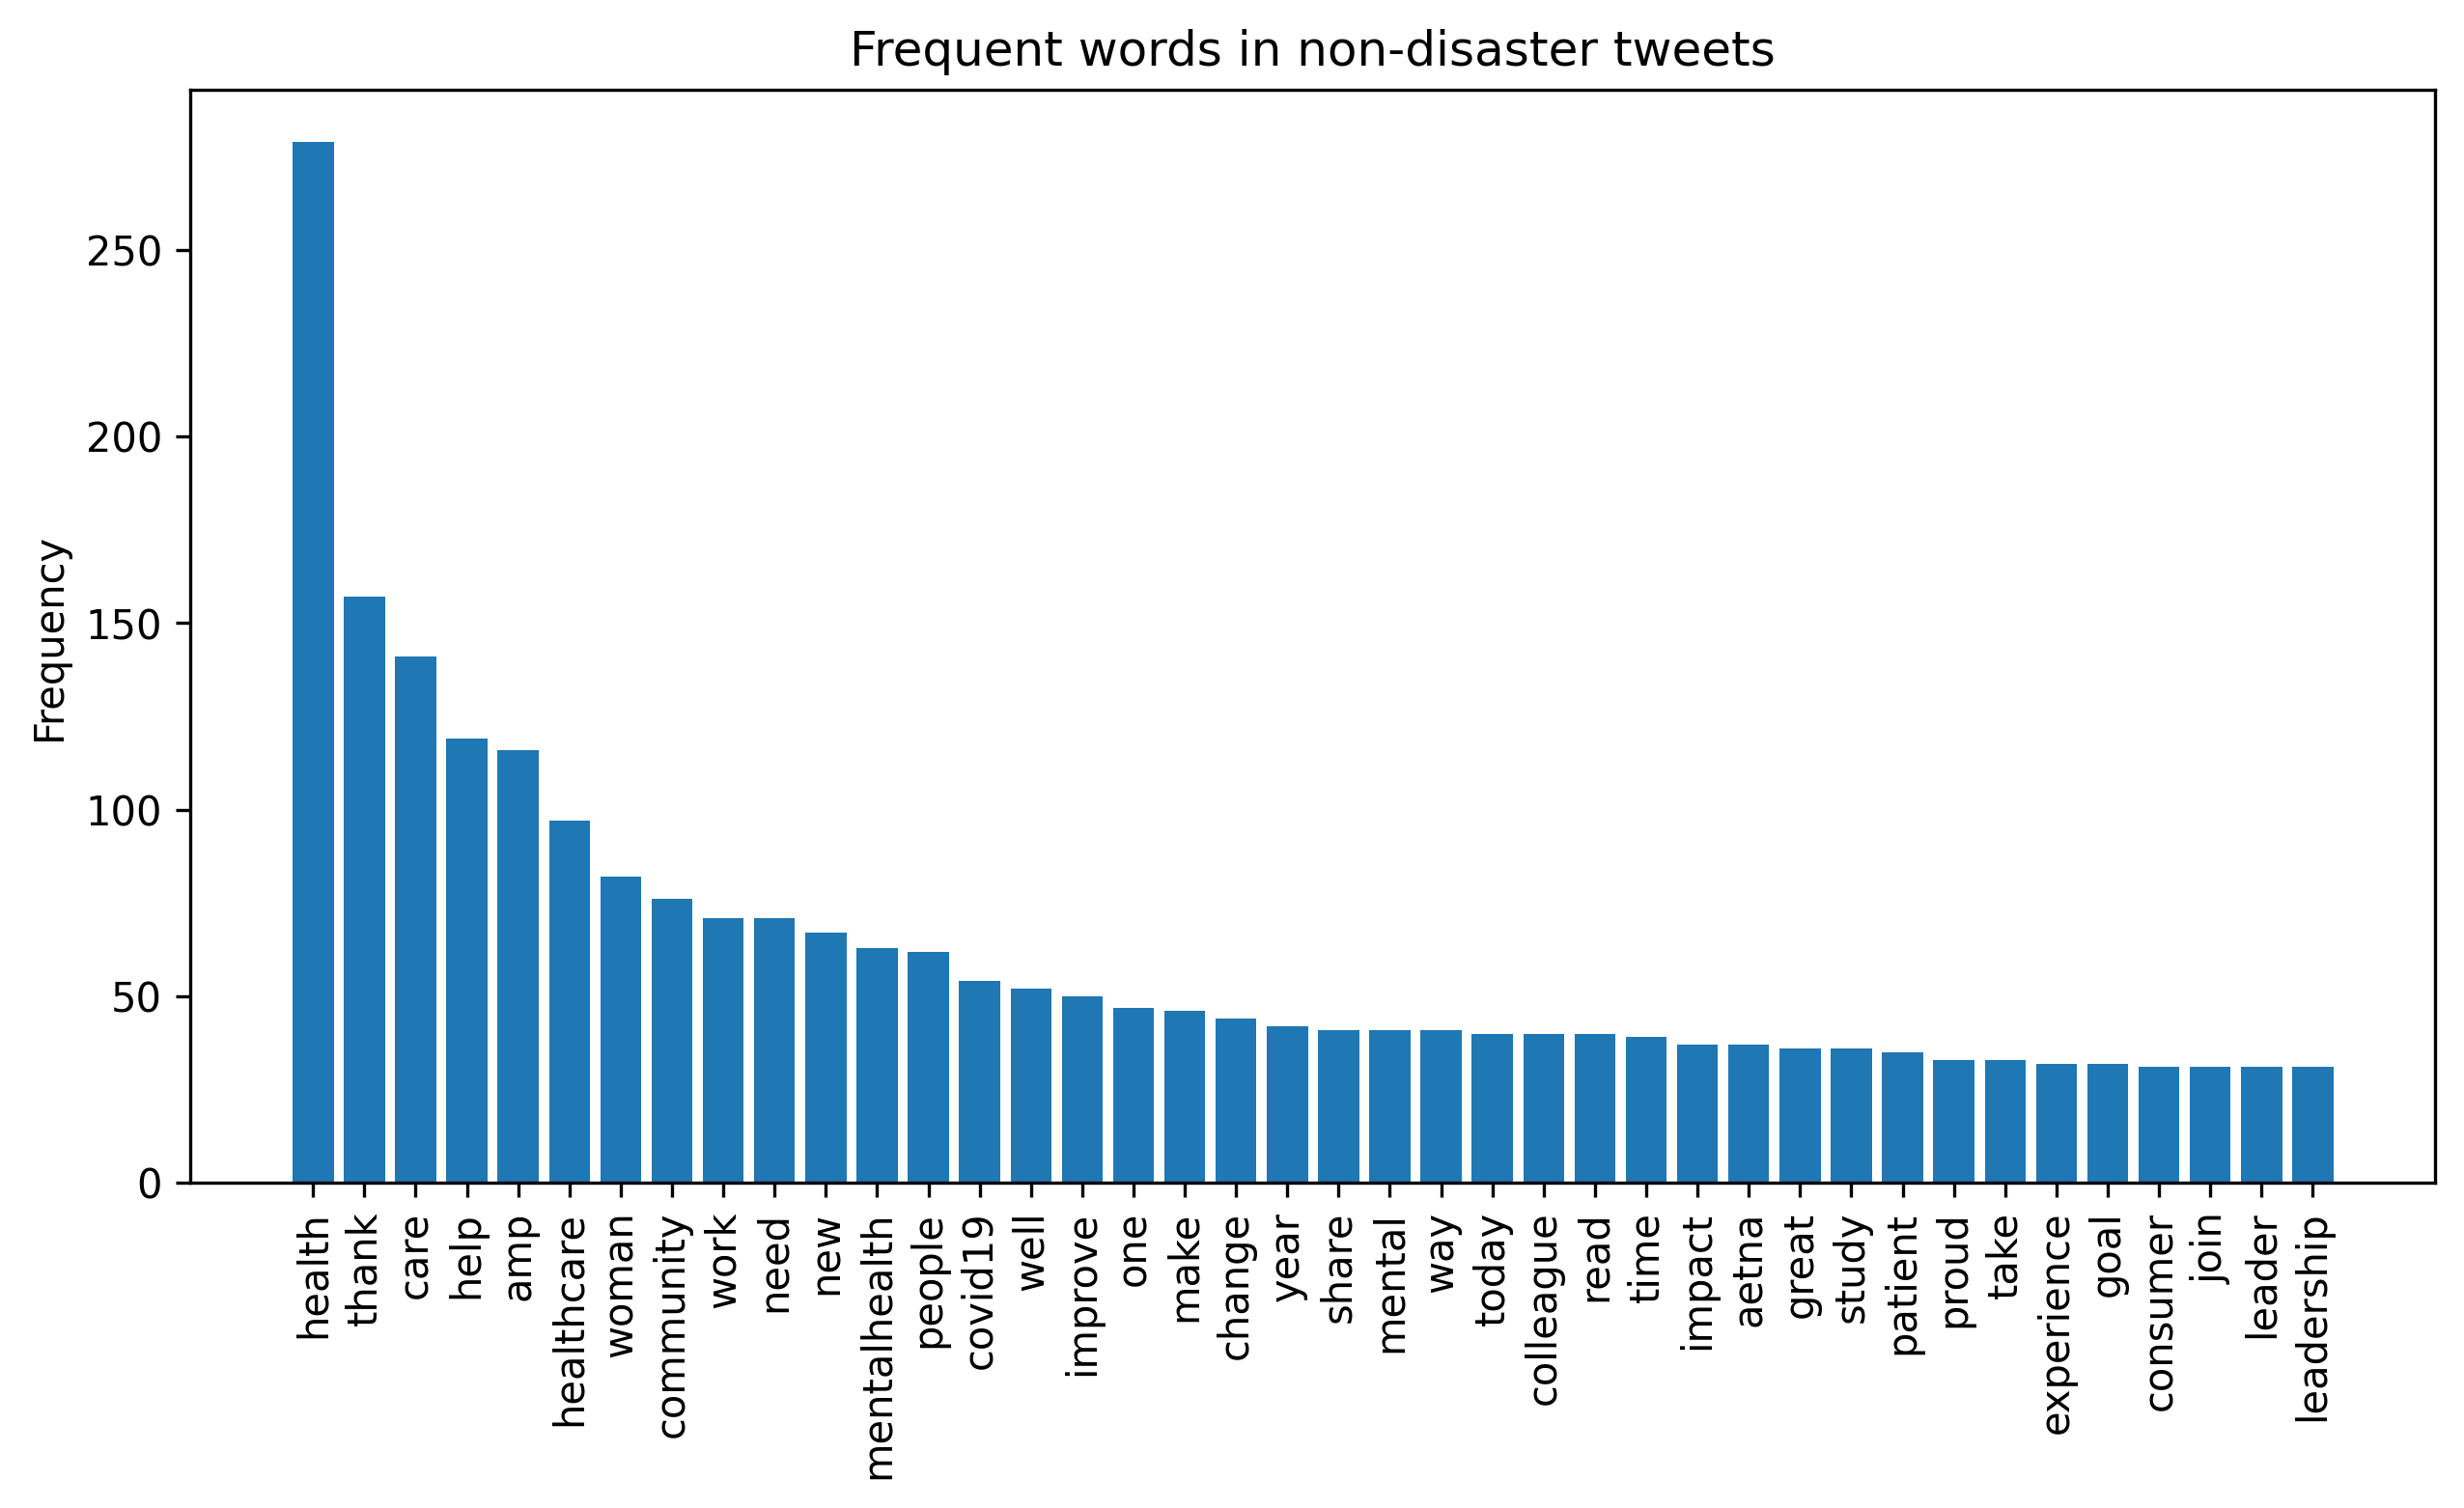

In [144]:
word_counts_lemma = Counter(corpus_lemma).most_common(40)
dict_word_lemma = dict(word_counts_lemma)
plt.figure(figsize=(10,5))
plt.bar(dict_word_lemma.keys(), dict_word_lemma.values())
plt.title('Frequent words in non-disaster tweets')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [130]:
corpus_tweet=[]
for sent in df_nlp['tweet_text']:
    for word in sent.split():
        corpus_tweet.append(word)

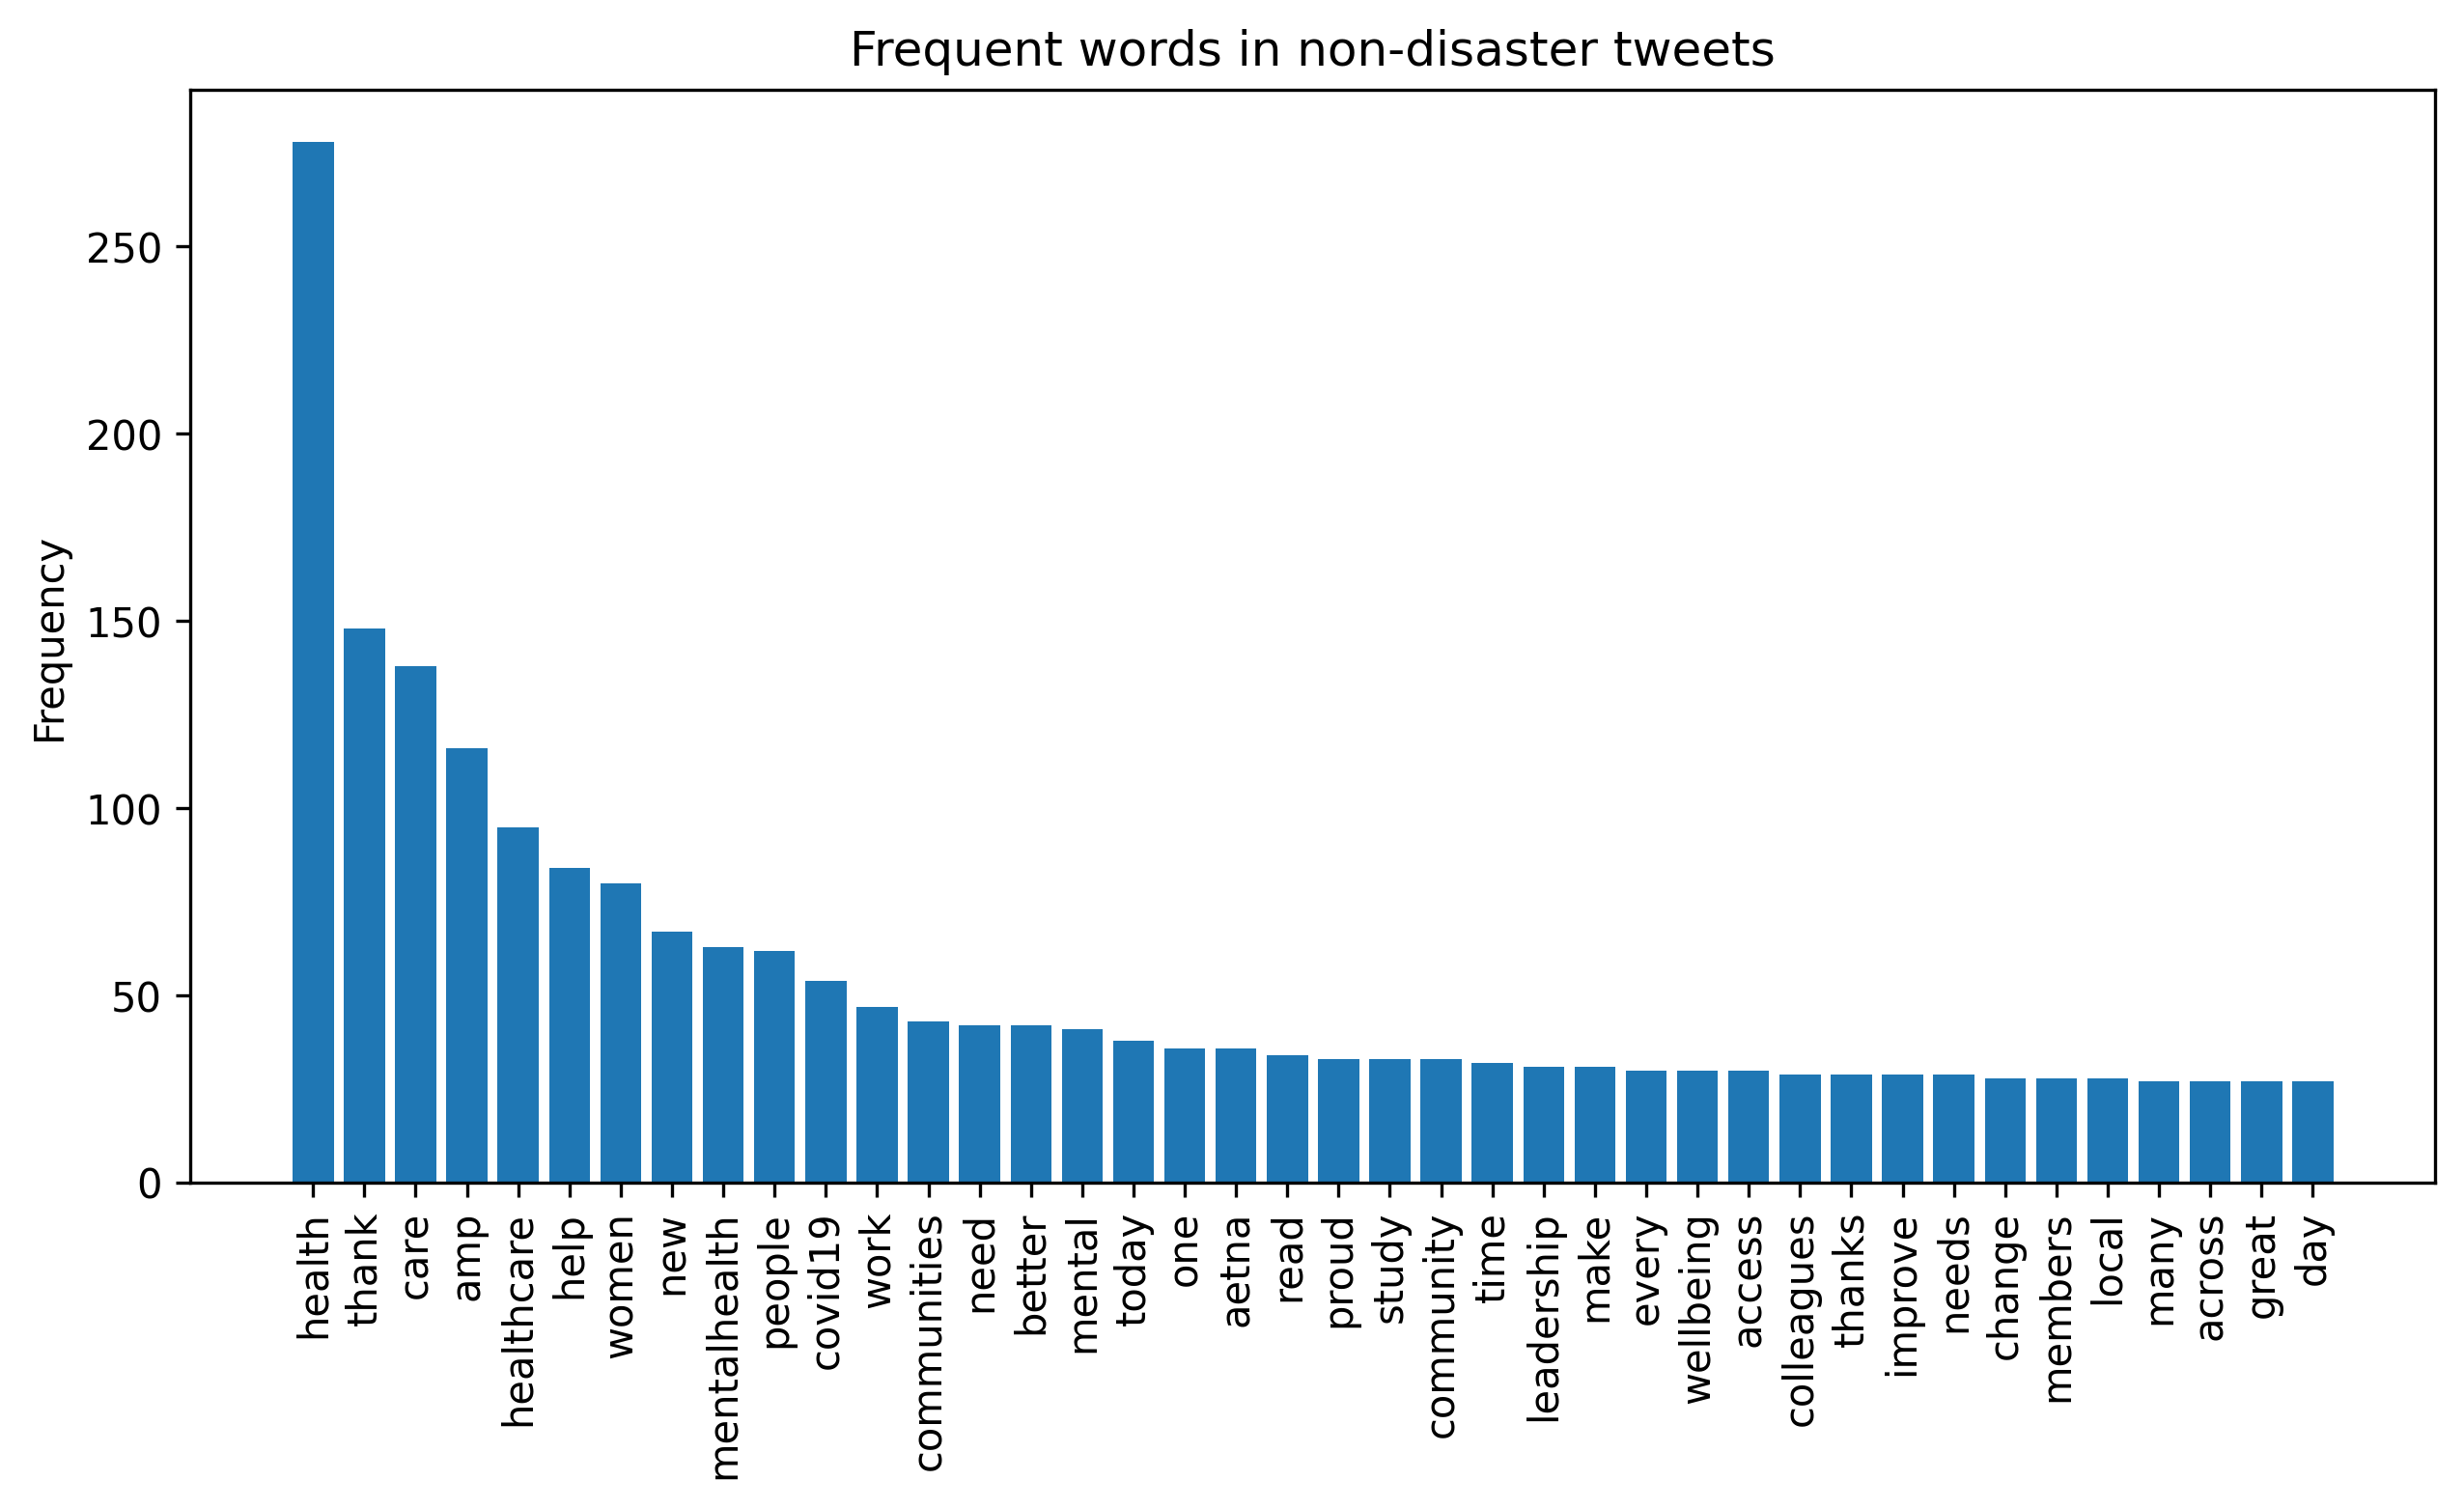

In [145]:
word_counts_tweet = Counter(corpus_tweet).most_common(40)
dict_word_tweet = dict(word_counts_tweet)
plt.figure(figsize=(10,5))
plt.bar(dict_word_tweet.keys(), dict_word_tweet.values())
plt.title('Frequent words in non-disaster tweets')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [137]:
from wordcloud import WordCloud 



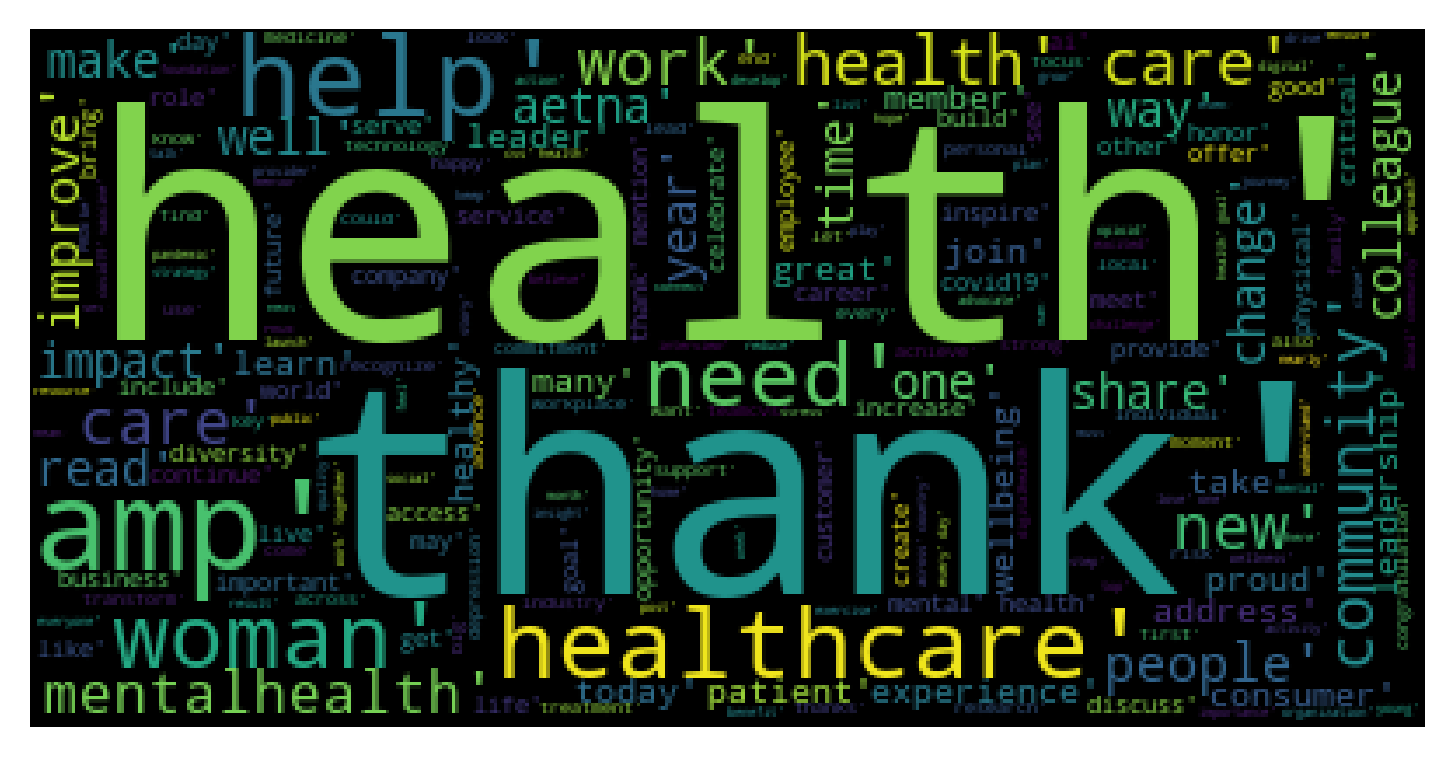

In [143]:

wordcloud = WordCloud().generate(str(corpus_lemma))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()